# 苑老师给的lamost ob星表


In [95]:
from astropy.io import fits
import numpy as np
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline

data_main_path = '/Users/dengdingshan/Documents/data/obic/'

In [191]:
# add the data from the Allen's book (J-H)
Allen_color =[-0.1,-0.09] #[-0.04,-0.03] #[-0.1,-0.09]
Allen_teff = [25600,22300]

In [192]:
# Read the fits file.
Lamost_fits = fits.open(data_main_path + 'LamostX2mass.fits')
Lamost_tbl = Lamost_fits[1].data

In [193]:
# Filtering data (should be recorded and discussed!)

# For programming, only teff and logg > 0 is now required.
Lamost_tbl_fil = Lamost_tbl[np.argwhere((Lamost_tbl['teff'] > 0) & (Lamost_tbl['logg'] > -3) & 
                                       (Lamost_tbl['Jmag'] > -1) & (Lamost_tbl['Hmag'] > -1) )]


# the sources should both have the data of JHK and W1W2W3 before we use them.

# Lamost_tbl_fil = Lamost_tbl_fil[np.logical_not( (Lamost_tbl_fil['Jmag']==0)&(Lamost_tbl_fil['Hmag']==0))]

# Lamost_tbl_fil = Lamost_tbl_fil[np.logical_and(\
#                                                np.logical_not((Lamost_tbl_fil['Jmag'] == 0) & (Lamost_tbl_fil['Hmag'] == 0)),\
#                                                np.logical_not((Lamost_tbl_fil['Hmag'] == 0) & (Lamost_tbl_fil['W2'] == 0)))]

In [194]:
print(Lamost_tbl_fil['e_Kmag'])
print(len(Lamost_tbl_fil))
np.logical_not(np.isnan(Lamost_tbl_fil['e_Kmag']))

[[ 0.23199999]
 [ 0.235     ]
 [ 0.21799999]
 ..., 
 [ 0.226     ]
 [        nan]
 [ 0.23899999]]
2337


array([[ True],
       [ True],
       [ True],
       ..., 
       [ True],
       [False],
       [ True]], dtype=bool)

In [195]:
# Determine the input numbers.

# Bin width, usually 50
bin_width = 500
# Ratio of the bluest edge, usually 5%
ratio = 5
# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 100

In [196]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.
teff_start = min(Lamost_tbl_fil['teff']) - min(Lamost_tbl_fil['teff']) % (bin_width/2)
bin_number = math.ceil((max(Lamost_tbl_fil['teff']) - teff_start) / bin_width)

In [197]:
start_time = time.time()
int_teff = []
int_color = []
for i in range(bin_number):
    bin_tbl = Lamost_tbl_fil[np.logical_and(Lamost_tbl_fil['teff'] > teff_start+i*bin_width, \
                                            Lamost_tbl_fil['teff'] < teff_start+(i+1)*bin_width)]
    if len(bin_tbl) < low_crit:
        continue
    source_num = 0
    while source_num != len(bin_tbl):
        source_num = len(bin_tbl)
        bin_mean = np.mean(bin_tbl['Jmag']-bin_tbl['Hmag'])
        bin_sigma = np.std(bin_tbl['Jmag']-bin_tbl['Hmag'])
        bin_tbl = bin_tbl[np.logical_or(bin_tbl['Jmag']-bin_tbl['Hmag'] < bin_mean+3*bin_sigma, \
                                  bin_tbl['Jmag']-bin_tbl['Hmag'] > bin_mean-3*bin_sigma)]
    int_teff.append(float(teff_start+(i+0.5)*bin_width))
    int_color.append(np.median(np.sort(bin_tbl['Jmag']-bin_tbl['Hmag'])[:math.ceil(len(bin_tbl)*ratio/100)]))
#     int_color.append(np.min(bin_tbl['Jmag'] - bin_tbl['Hmag']))
    
print(time.time() - start_time)

print(int_teff)
print(int_color)

0.6604180335998535
[20250.0, 20750.0, 21250.0, 21750.0, 22250.0, 22750.0, 23250.0]
[-0.11999989, -0.13000011, -0.10999966, -0.14399958, -0.06000042, -0.16499996, -0.21500015]


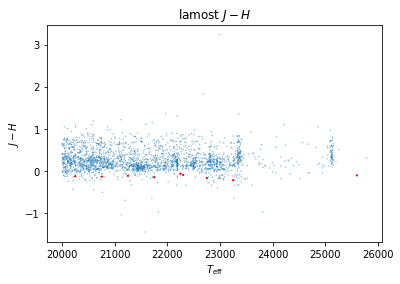

In [198]:
plt.scatter(Lamost_tbl_fil['teff'], Lamost_tbl_fil['Jmag']-Lamost_tbl_fil['Hmag'], s=2, edgecolors='None', alpha=0.5)
plt.scatter(int_teff, int_color, c='r', edgecolors='None', s=5)
plt.scatter(Allen_teff, Allen_color, c='m',edgecolors = 'None', s=5)
plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel('$J-H$')
#plt.ylim(-1,2.5)
plt.title('lamost $J-H$')
plt.savefig('figure/fig.png', dpi=200)
plt.show()